<div align="center">
 <b>HOMEWORK</b>
</div>
In this homework, we will use the Bank Marketing dataset.
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
We need to take bank/bank-full.csv file from the downloaded zip-file.

In [172]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.interpolate import interp1d

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold



In [154]:
df_full = pd.read_csv('bank-full.csv', delimiter=';')

# In this dataset our desired target for classification task will be y variable - has the client subscribed a term deposit or not.
# For the rest of the homework, you'll need to use only these columns:
# age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

# 1. Select only the features from above.
features = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

data = df_full[features]
data_features = data.drop('y', axis=1)
data_target = data['y']






In [155]:
data.y = (data.y == 'yes').astype(int)
data

C:\Users\gabriel.rangel\AppData\Local\Temp\ipykernel_16964\2313097522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.y = (data.y == 'yes').astype(int)


,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [156]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

assert len(data) == (len(df_train) + len(df_val) + len(df_test))

len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [157]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [158]:
## Question 1: ROC AUC feature importance
# ROC AUC could also be used to evaluate feature importance of numerical variables.

# Let's do that

# For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
# Use the training dataset for that
# If your AUC is < 0.5, invert this variable by putting "-" in front

# (e.g. -df_train['engine_hp'])

# AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

# Which numerical variable (among the following 4) has the highest AUC?

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27126 entries, 0 to 27125
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        27126 non-null  int64 
 1   job        27126 non-null  object
 2   marital    27126 non-null  object
 3   education  27126 non-null  object
 4   balance    27126 non-null  int64 
 5   housing    27126 non-null  object
 6   contact    27126 non-null  object
 7   day        27126 non-null  int64 
 8   month      27126 non-null  object
 9   duration   27126 non-null  int64 
 10  campaign   27126 non-null  int64 
 11  pdays      27126 non-null  int64 
 12  previous   27126 non-null  int64 
 13  poutcome   27126 non-null  object
dtypes: int64(7), object(7)
memory usage: 2.9+ MB


In [159]:
# numerical variables
numerical = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

roc_auc_scores = {}
for col in numerical:
    print(col)
    roc_auc = roc_auc_score(y_train, df_train[col])
    if roc_auc < 0.5:
        roc_auc = roc_auc_score(y_train, -df_train[col])
    print(f"score: {roc_auc}")
    roc_auc_scores[col] = roc_auc

# Answer: duration
print(f'\n Answer: The highest AUC is {max(roc_auc_scores, key=roc_auc_scores.get)}')

age
score: 0.512185717527344
balance
score: 0.5888313805382317
day
score: 0.525957882383908
duration
score: 0.8147002759670778
campaign
score: 0.5714543015682159
pdays
score: 0.5901276247352144
previous
score: 0.5985653242764153

 Answer: The highest AUC is duration


In [160]:
## Question 2: Training the model
# Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:
# LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
# What's the AUC of this model on the validation dataset? (round to 3 digits)

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient="records")

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, solver='liblinear')

In [161]:
y_pred = model.predict_proba(X_val)[:,1]

In [162]:
roc_auc_score = roc_auc_score(y_val, y_pred)
print(f'\n Answer: The AUC of this model on the validation dataset is {round(roc_auc_score, 3)}')


 Answer: The AUC of this model on the validation dataset is 0.901


In [163]:
## Question 3: Precision and Recall
# Now let's compute precision and recall for our model.

# Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
# For each threshold, compute precision and recall
# Plot them
# At which threshold precision and recall curves intersect?

thresholds = np.linspace(0.0, 1.0, 101)
thresholds



array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [164]:
recall = []
precision = []

for t in thresholds:
    actual_positives = (y_val == 1)
    actual_negatives = (y_val == 0)
    predicted_positives = (y_pred >= t)
    predicted_negatives = (y_pred < t)

    tp = (actual_positives & predicted_positives).sum()
    fn = (predicted_negatives & actual_positives).sum()
    fp = (predicted_positives & actual_negatives).sum()

    r = tp / (tp + fn)
    p = tp / (tp + fp)

    recall.append(r)
    precision.append(p)


# Find the intersection point
def find_intersection(x, y1, y2):
    # Interpolate the lines
    interp1 = interp1d(x, y1, kind='linear')
    interp2 = interp1d(x, y2, kind='linear')

    # Find the intersection point
    for i in range(1, len(x)):
        if (y1[i-1] - y2[i-1]) * (y1[i] - y2[i]) < 0:
            x_intersect = x[i-1] + (x[i] - x[i-1]) * (y2[i-1] - y1[i-1]) / ((y1[i] - y1[i-1]) - (y2[i] - y2[i-1]))
            y_intersect = interp1(x_intersect)
            return x_intersect, y_intersect
    return None, None

# Find the intersection point
x = np.arange(len(recall))
x_intersect, y_intersect = find_intersection(x, recall, precision)

if x_intersect is not None:
    print(f"The lines intersect at x = {x_intersect}, y = {y_intersect}")
else:
    print("The lines do not intersect")





The lines intersect at x = 26.186271545207138, y = 0.5588146356214092


C:\Users\gabriel.rangel\AppData\Local\Temp\ipykernel_16964\3702415746.py:15: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


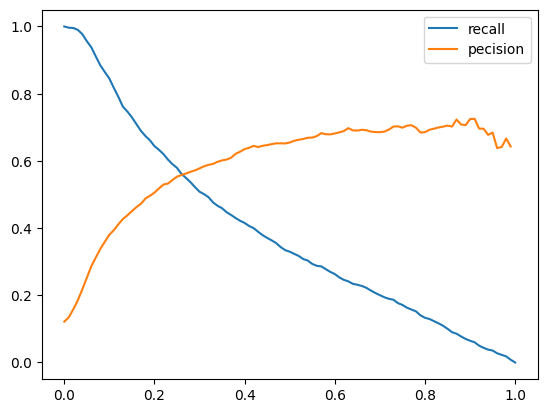

In [165]:

plt.plot(thresholds, recall, label="recall")
plt.plot(thresholds, precision, label="pecision")
plt.legend();

Answer: The F1 score is maximal at threshold 0.22


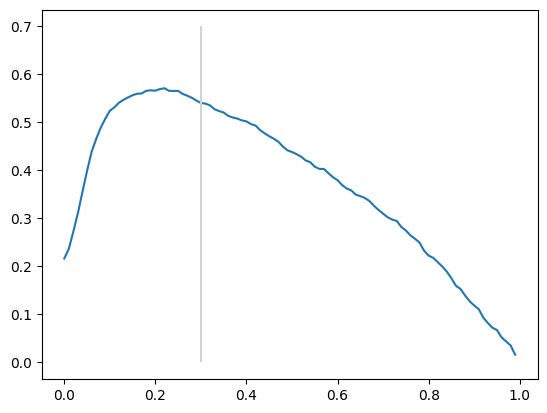

In [166]:
## Question 4: F1 score
# Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both
# This is the formula for computing F1:  F1 = 2 * P * R/(P + R)

# Where:
#     P is precision and
#     R is recall.

# Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01
# At which threshold F1 is maximal?

f1_scores = []
for i, t in enumerate(thresholds):

    f1 = 2 * precision[i] * recall[i] / (precision[i] + recall[i])

    f1_scores.append(f1)

plt.plot(thresholds, f1_scores)
plt.vlines(0.3, 0, 0.7, color="lightgrey");

# find the number to print it programactically
max_f1_score = max(f1_scores)
max_f1_score_index = f1_scores.index(max_f1_score)
max_f1_score_threshold = thresholds[max_f1_score_index]

print(f'Answer: The F1 score is maximal at threshold {max_f1_score_threshold}')

In [173]:
## Question 5: 5-Fold CV
# Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

# KFold(n_splits=5, shuffle=True, random_state=1)
# Iterate over different folds of df_full_train
# Split the data into train and validation
# Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
# Use AUC to evaluate the model on validation
# How large is standard deviation of the scores across different folds?

# import numpy as np
# from sklearn.model_selection import KFold
# from sklearn.feature_extraction import DictVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score

def kfold_train(C=1):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):

        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        train_dicts = df_train[numerical].to_dict(orient="records")
        val_dicts = df_val[numerical].to_dict(orient="records")

        dv = DictVectorizer(sparse=False)
        dv.fit(train_dicts)
        X_train = dv.transform(train_dicts)
        X_val = dv.transform(val_dicts)

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_val)[:, 1]

        scores.append(roc_auc_score(y_val, y_pred))

    return scores

# Assuming df_full_train and numerical are defined
# df_full_train = ...
# numerical = ...

scores = kfold_train()

print(f"mean score: {np.mean(scores):.4f}, standard deviation: {np.std(scores):.4f}")

mean score: 0.8316, standard deviation: 0.0066


In [176]:
## Question 6: Hyperparameter Tuning
# Now let's use 5-Fold cross-validation to find the best parameter C

# Iterate over the following C values: [0.000001, 0.001, 1]
# Initialize KFold with the same parameters as previously
# Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
# Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
# Which C leads to the best mean score? ( 0.000001,0.001,1)
# If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

C = [0.000001, 0.001, 1]

best_score = None
best_c = None

for c in C:
    scores = kfold_train(C=c)
    if best_score is None or np.mean(scores) > best_score[0] or (np.mean(scores) == best_score[0] and np.std(scores) < best_score[1]):
        best_score = (np.mean(scores), np.std(scores))
        best_c = c
    print(f"C: {c}, mean score: {np.mean(scores)}, standard deviation: {np.std(scores)}")

# Answer: C=1 leads to the best mean score
print(f'\nThe best C is {best_c}')

C: 1e-06, mean score: 0.7006455904329297, standard deviation: 0.009404614325266658
C: 0.001, mean score: 0.7663785957603709, standard deviation: 0.009156674056606183
C: 1, mean score: 0.8315578153669183, standard deviation: 0.006570171051525341

The best C is 1
